# Riemann Problem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit.simdir import SimDir
from kuibit.grid_data import UniformGrid

#%matplotlib inline
%config InlineBackend.figure_format='retina'
#!pip install git+https://github.com/M-Bianchi/My_matplotlib_style
plt.style.use('mystyle')

In [2]:
# Initial data from the Exact Riemann solver of https://www.brunogiacomazzo.org/?page_id=395
exact = np.loadtxt("Sod_exact.dat") # [x, rho, total pressure p, vx, vy, vz, By, Bz]

In [3]:
x_exact =     exact[:,0]
rho_exact =   exact[:,1]
press_exact = exact[:,2] # Note: this is pgas+pmag
vx_exact =    exact[:,3]
vy_exact =    exact[:,4]
vz_exact =    exact[:,5]
By_exact =    exact[:,6]
Bz_exact =    exact[:,7]

## Read the Numerical Results

Execution: ./cactus_sim ./Sod_1d.par

If it returns "permission denied": chmod a+x cactus_sim

In [4]:
gf_025 = SimDir("./Sod_1d_400_025/").gf
gf_0025 = SimDir("./Sod_1d_400_0025/").gf
gf_00025 = SimDir("./Sod_1d_400_00025/").gf
print(gf_00025)


Available grid data of dimension 1D (x): 
['dens', 'eps', 'press', 'rho', 'scon[0]', 'scon[1]', 'scon[2]', 'tau', 'vel[0]', 'vel[1]', 'vel[2]', 'w_lorentz']


Available grid data of dimension 1D (y): 
['dens', 'eps', 'press', 'rho', 'scon[0]', 'scon[1]', 'scon[2]', 'tau', 'vel[0]', 'vel[1]', 'vel[2]', 'w_lorentz']


Available grid data of dimension 1D (z): 
['dens', 'eps', 'press', 'rho', 'scon[0]', 'scon[1]', 'scon[2]', 'tau', 'vel[0]', 'vel[1]', 'vel[2]', 'w_lorentz']


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
[]



In [5]:
vars1d_025 = gf_025.x
vars1d_0025 = gf_0025.x
vars1d_00025 = gf_00025.x
print(vars1d_00025)


Available grid data of dimension 1D (x): 
['dens', 'eps', 'press', 'rho', 'scon[0]', 'scon[1]', 'scon[2]', 'tau', 'vel[0]', 'vel[1]', 'vel[2]', 'w_lorentz']



## Kuibit Standard Methods for Plots

We create a uniform grid and plot the data on it. Kuibit indeed assumes that data were produced on a grid with several meshes (AMR). In our case the grid was already uniform, so later we will see an alternative way to plot the data without interpolating them on a new grid.

### 1) Rho

In [6]:
rho_025 = vars1d_025.fields.rho
rho_0025 = vars1d_0025.fields.rho
rho_00025 = vars1d_00025.fields.rho

In [7]:
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45])

In [8]:
print(rho_025.iterations)
print(rho_0025.iterations)
print(rho_00025.iterations)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610

In [9]:
rho_initial_025 = rho_025.read_on_grid(0, small_grid)
rho_initial_0025 = rho_0025.read_on_grid(0, small_grid)
rho_initial_00025 = rho_00025.read_on_grid(0, small_grid)

rho_final_025 = rho_025.read_on_grid(rho_025.iterations[-1], small_grid)
rho_final_0025 = rho_0025.read_on_grid(rho_0025.iterations[-1], small_grid)
rho_final_00025 = rho_00025.read_on_grid(rho_00025.iterations[-1], small_grid)

In [10]:
print(*rho_final_00025.coordinates_meshgrid())

[-4.50000000e-01 -4.41000000e-01 -4.32000000e-01 -4.23000000e-01
 -4.14000000e-01 -4.05000000e-01 -3.96000000e-01 -3.87000000e-01
 -3.78000000e-01 -3.69000000e-01 -3.60000000e-01 -3.51000000e-01
 -3.42000000e-01 -3.33000000e-01 -3.24000000e-01 -3.15000000e-01
 -3.06000000e-01 -2.97000000e-01 -2.88000000e-01 -2.79000000e-01
 -2.70000000e-01 -2.61000000e-01 -2.52000000e-01 -2.43000000e-01
 -2.34000000e-01 -2.25000000e-01 -2.16000000e-01 -2.07000000e-01
 -1.98000000e-01 -1.89000000e-01 -1.80000000e-01 -1.71000000e-01
 -1.62000000e-01 -1.53000000e-01 -1.44000000e-01 -1.35000000e-01
 -1.26000000e-01 -1.17000000e-01 -1.08000000e-01 -9.90000000e-02
 -9.00000000e-02 -8.10000000e-02 -7.20000000e-02 -6.30000000e-02
 -5.40000000e-02 -4.50000000e-02 -3.60000000e-02 -2.70000000e-02
 -1.80000000e-02 -9.00000000e-03  5.55111512e-17  9.00000000e-03
  1.80000000e-02  2.70000000e-02  3.60000000e-02  4.50000000e-02
  5.40000000e-02  6.30000000e-02  7.20000000e-02  8.10000000e-02
  9.00000000e-02  9.90000

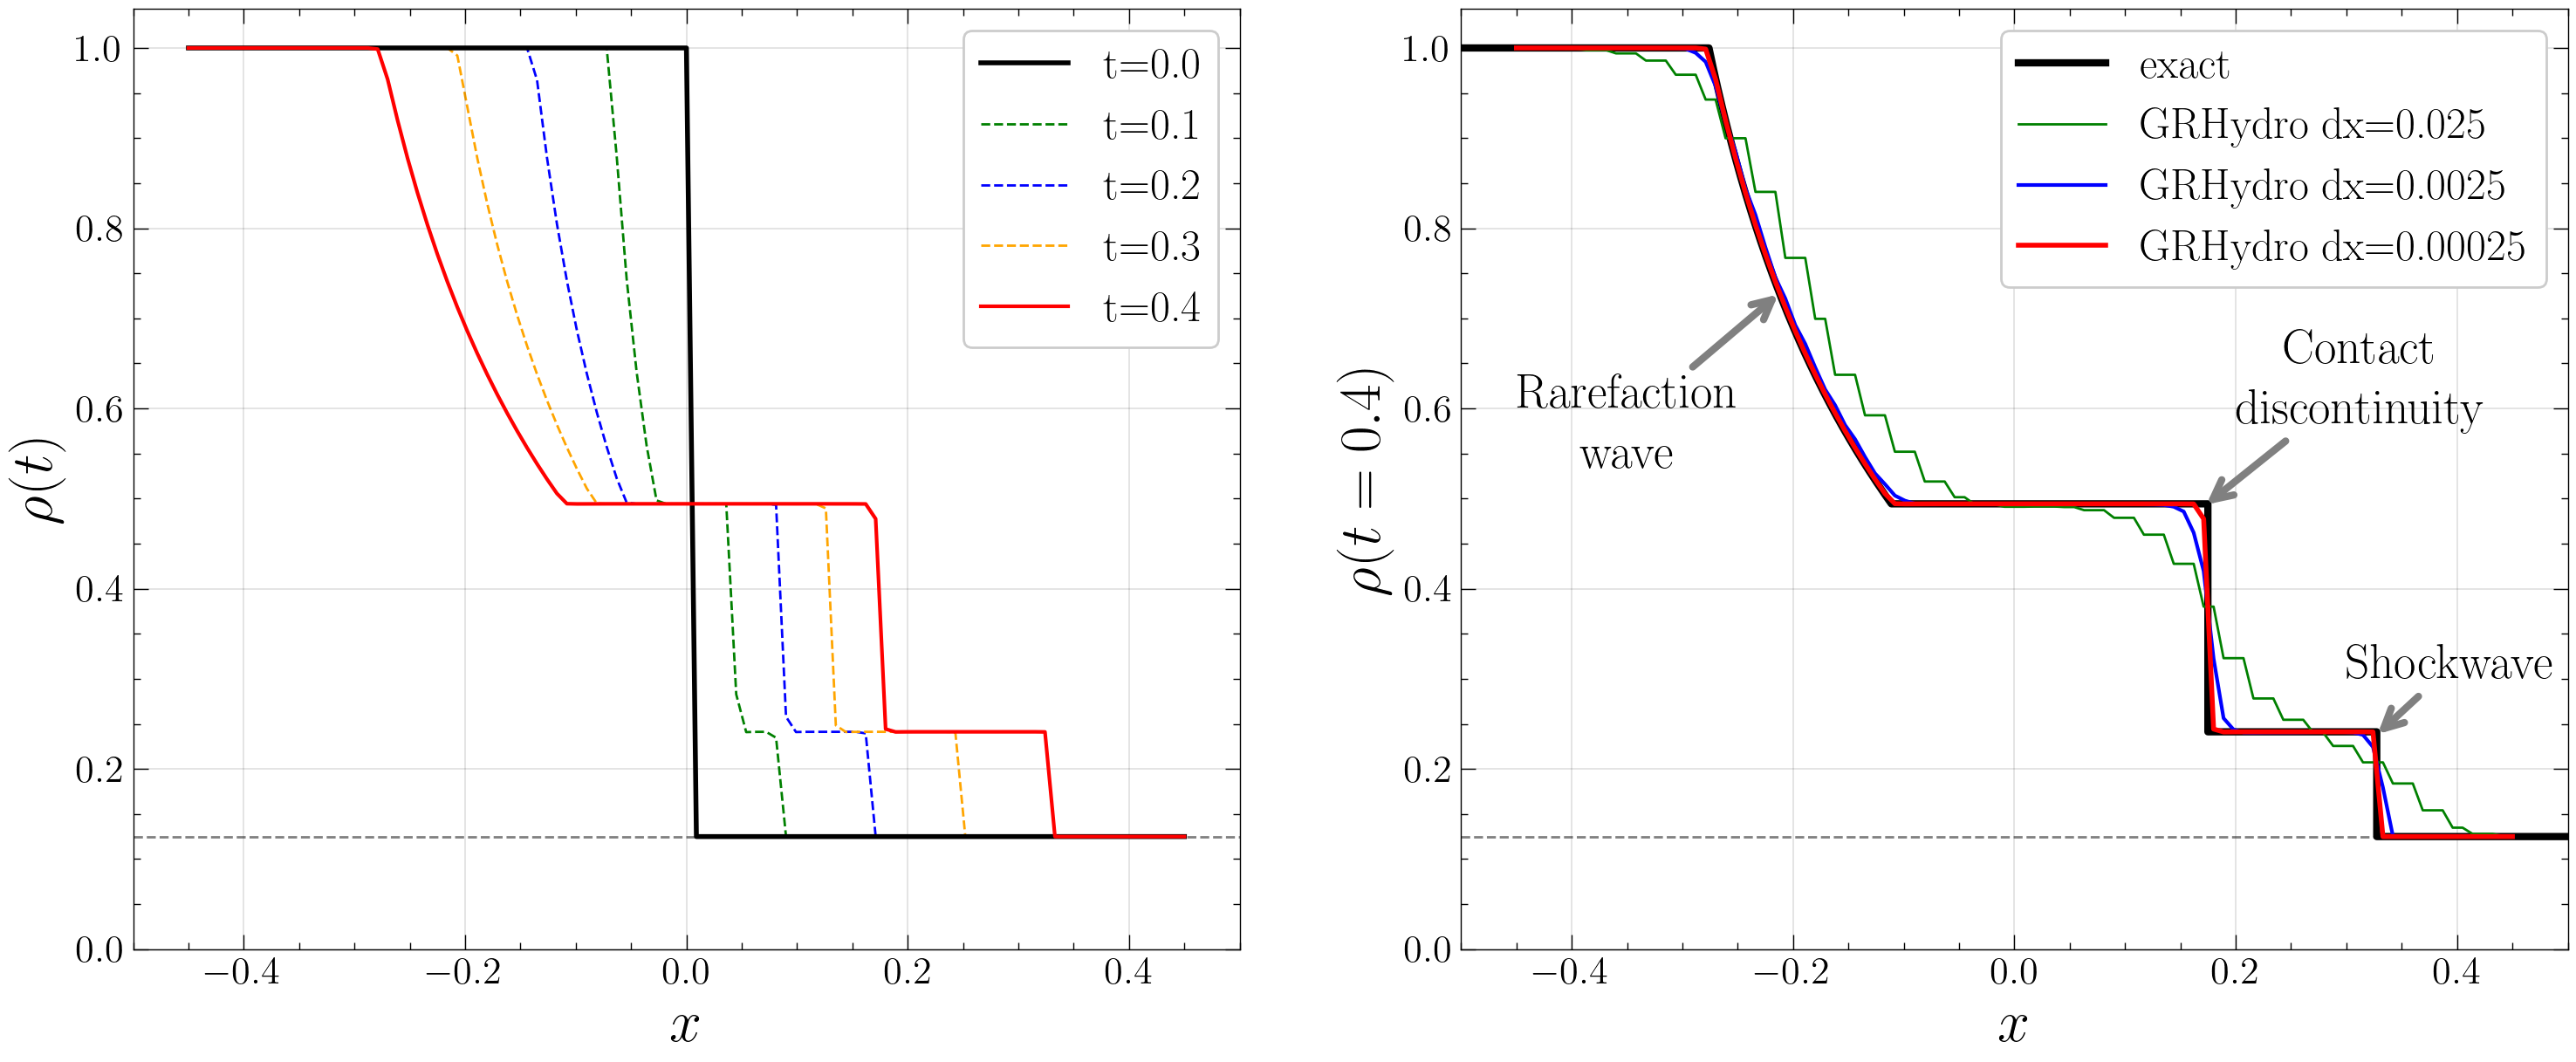

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

ax = axes[0]
rho_t01_00025 = rho_00025.read_on_grid(rho_00025.iterations[50], small_grid)
rho_t02_00025 = rho_00025.read_on_grid(rho_00025.iterations[100], small_grid)
rho_t03_00025 = rho_00025.read_on_grid(rho_00025.iterations[150], small_grid)
ax.plot(*rho_initial_00025.coordinates_meshgrid(), rho_initial_00025.data_xyz, c='k', ls='-', lw=2, label="t=0.0")
ax.plot(*rho_t01_00025.coordinates_meshgrid(), rho_t01_00025.data_xyz, c='green', ls='--', lw=1, zorder=0, label="t=0.1")
ax.plot(*rho_t02_00025.coordinates_meshgrid(), rho_t02_00025.data_xyz, c='blue', ls='--', lw=1, zorder=0, label="t=0.2")
ax.plot(*rho_t03_00025.coordinates_meshgrid(), rho_t03_00025.data_xyz, c='orange', ls='--', lw=1, zorder=0, label="t=0.3")
ax.plot(*rho_final_00025.coordinates_meshgrid(), rho_final_00025.data_xyz, c='red', ls='-', lw=1.5, label="t=0.4")
ax.axhline(0.125, c='gray', ls='--', lw=1, zorder=0)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(0)
ax.set_xlabel('$x$')
ax.set_ylabel('$\\rho (t)$')
ax.legend();


ax = axes[1]
ax.plot(x_exact, rho_exact, c='k', lw=3, label="exact")
ax.plot(*rho_final_025.coordinates_meshgrid(), rho_final_025.data_xyz, c='green', lw=1., label="GRHydro dx=0.025")
ax.plot(*rho_final_0025.coordinates_meshgrid(), rho_final_0025.data_xyz, c='blue', lw=1.5, label="GRHydro dx=0.0025")
ax.plot(*rho_final_00025.coordinates_meshgrid(), rho_final_00025.data_xyz, c='red', lw=2, label="GRHydro dx=0.00025")
ax.axhline(0.125, c='gray', ls='--', lw=1, zorder=0)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(0)
ax.set_xlabel('$x$')
ax.set_ylabel('$\\rho (t=0.4)$')
ax.legend();

ax.annotate('Shockwave', fontsize=20,
            xy=(0.325, 0.235), xycoords='data',
            xytext=(0.3, 0.3), textcoords='data',
            arrowprops=dict(arrowstyle= '->', color='gray', lw=3, ls='-'))

ax.annotate(r'\begin{center}Contact\\discontinuity\end{center}', fontsize=20,
            xy=(0.17, 0.49), xycoords='data',
            xytext=(0.2, 0.65), textcoords='data',
            arrowprops=dict(arrowstyle= '->', color='gray', lw=3, ls='-'))

ax.annotate(r'\begin{center}Rarefaction\\wave\end{center}', fontsize=20,
            xy=(-0.21, 0.73), xycoords='data',
            xytext=(-0.45, 0.6), textcoords='data',
            arrowprops=dict(arrowstyle= '->', color='gray', lw=3, ls='-'));

### 2) Pressure

In [12]:
press_025 = vars1d_025.fields.press
press_0025 = vars1d_0025.fields.press
press_00025 = vars1d_00025.fields.press

press_initial_025 = press_025.read_on_grid(0, small_grid)
press_initial_0025 = press_0025.read_on_grid(0, small_grid)
press_initial_00025 = press_00025.read_on_grid(0, small_grid)

press_final_025 = press_025.read_on_grid(press_025.iterations[-1], small_grid)
press_final_0025 = press_0025.read_on_grid(press_0025.iterations[-1], small_grid)
press_final_00025 = press_00025.read_on_grid(press_00025.iterations[-1], small_grid)

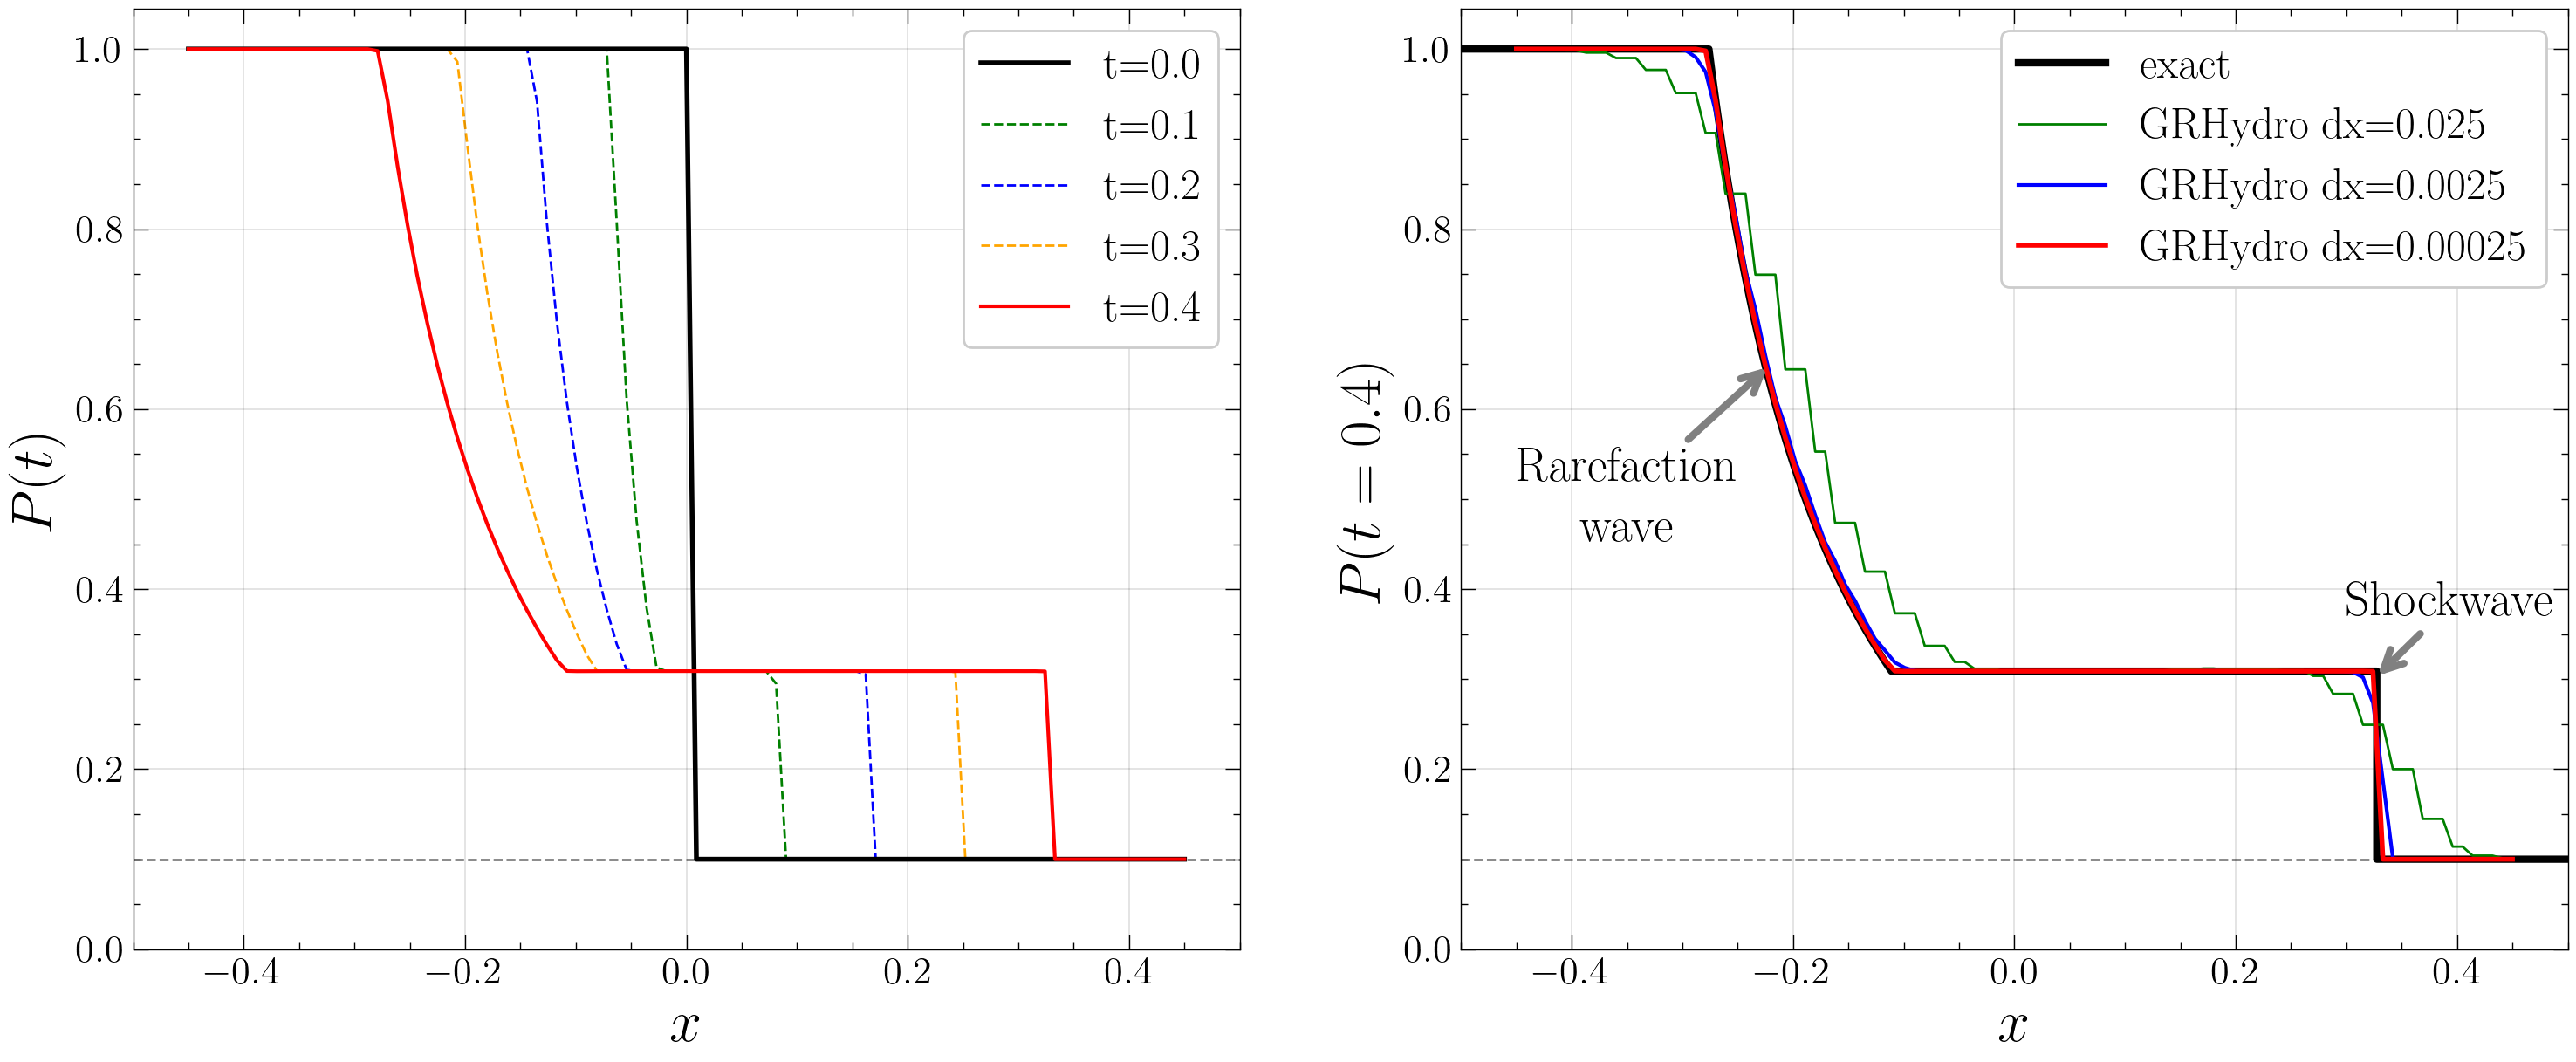

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

ax = axes[0]
press_t01_00025 = press_00025.read_on_grid(press_00025.iterations[50], small_grid)
press_t02_00025 = press_00025.read_on_grid(press_00025.iterations[100], small_grid)
press_t03_00025 = press_00025.read_on_grid(press_00025.iterations[150], small_grid)
ax.plot(*press_initial_00025.coordinates_meshgrid(), press_initial_00025.data_xyz, c='k', ls='-', lw=2, label="t=0.0")
ax.plot(*press_t01_00025.coordinates_meshgrid(), press_t01_00025.data_xyz, c='green', ls='--', lw=1, zorder=0, label="t=0.1")
ax.plot(*press_t02_00025.coordinates_meshgrid(), press_t02_00025.data_xyz, c='blue', ls='--', lw=1, zorder=0, label="t=0.2")
ax.plot(*press_t03_00025.coordinates_meshgrid(), press_t03_00025.data_xyz, c='orange', ls='--', lw=1, zorder=0, label="t=0.3")
ax.plot(*press_final_00025.coordinates_meshgrid(), press_final_00025.data_xyz, c='red', ls='-', lw=1.5, label="t=0.4")
ax.axhline(0.1, c='gray', ls='--', lw=1, zorder=0)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(0)
ax.set_xlabel('$x$')
ax.set_ylabel('$P (t)$')
ax.legend();

ax = axes[1]
ax.plot(x_exact, press_exact, c='k', lw=3, label="exact")
ax.plot(*press_final_025.coordinates_meshgrid(), press_final_025.data_xyz, c='green', lw=1., label="GRHydro dx=0.025")
ax.plot(*press_final_0025.coordinates_meshgrid(), press_final_0025.data_xyz, c='blue', lw=1.5, label="GRHydro dx=0.0025")
ax.plot(*press_final_00025.coordinates_meshgrid(), press_final_00025.data_xyz, c='red', lw=2, label="GRHydro dx=0.00025")
ax.axhline(0.1, c='gray', ls='--', lw=1, zorder=0)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(0)
ax.set_xlabel('$x$')
ax.set_ylabel('$P (t=0.4)$')
ax.legend();

ax.annotate('Shockwave', fontsize=20,
            xy=(0.325, 0.3), xycoords='data',
            xytext=(0.3, 0.37), textcoords='data',
            arrowprops=dict(arrowstyle= '->', color='gray', lw=3, ls='-'))

ax.annotate(r'\begin{center}Rarefaction\\wave\end{center}', fontsize=20,
            xy=(-0.22, 0.65), xycoords='data',
            xytext=(-0.45, 0.52), textcoords='data',
            arrowprops=dict(arrowstyle= '->', color='gray', lw=3, ls='-'));

### 3) Velocity in the x direction

In [14]:
velx_025 = vars1d_025.fields.vel[0]
velx_0025 = vars1d_0025.fields.vel[0]
velx_00025 = vars1d_00025.fields.vel[0]

velx_initial_025 = velx_025.read_on_grid(0, small_grid)
velx_initial_0025 = velx_0025.read_on_grid(0, small_grid)
velx_initial_00025 = velx_00025.read_on_grid(0, small_grid)

velx_final_025 = velx_025.read_on_grid(velx_025.iterations[-1], small_grid)
velx_final_0025 = velx_0025.read_on_grid(velx_0025.iterations[-1], small_grid)
velx_final_00025 = velx_00025.read_on_grid(velx_00025.iterations[-1], small_grid)

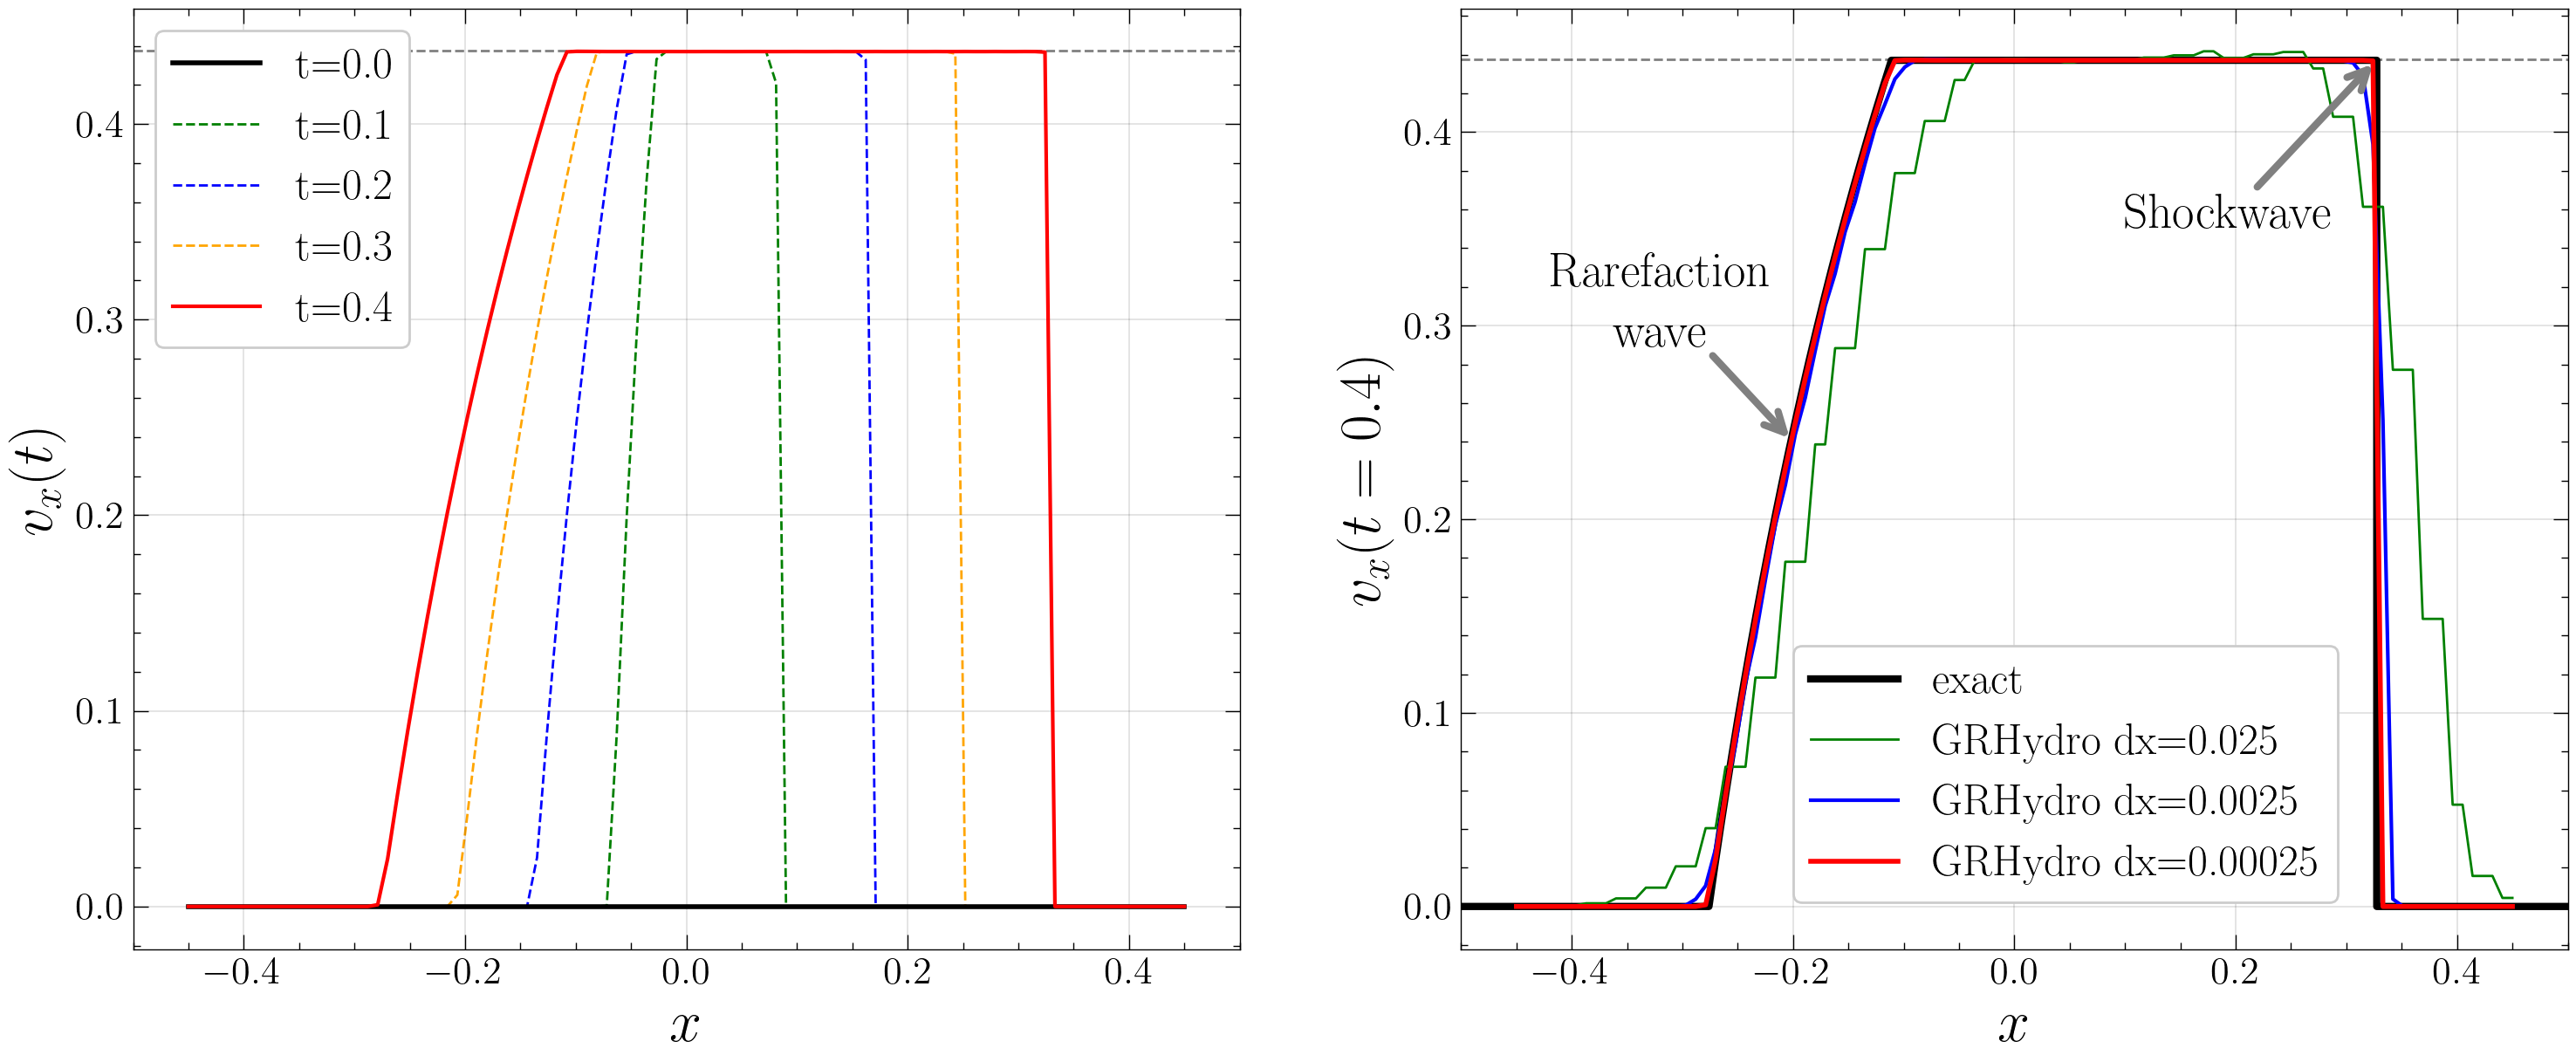

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

ax = axes[0]
velx_t01_00025 = velx_00025.read_on_grid(velx_00025.iterations[50], small_grid)
velx_t02_00025 = velx_00025.read_on_grid(velx_00025.iterations[100], small_grid)
velx_t03_00025 = velx_00025.read_on_grid(velx_00025.iterations[150], small_grid)
ax.plot(*velx_initial_00025.coordinates_meshgrid(), velx_initial_00025.data_xyz, c='k', ls='-', lw=2, label="t=0.0")
ax.plot(*velx_t01_00025.coordinates_meshgrid(), velx_t01_00025.data_xyz, c='green', ls='--', lw=1, zorder=0, label="t=0.1")
ax.plot(*velx_t02_00025.coordinates_meshgrid(), velx_t02_00025.data_xyz, c='blue', ls='--', lw=1, zorder=0, label="t=0.2")
ax.plot(*velx_t03_00025.coordinates_meshgrid(), velx_t03_00025.data_xyz, c='orange', ls='--', lw=1, zorder=0, label="t=0.3")
ax.plot(*velx_final_00025.coordinates_meshgrid(), velx_final_00025.data_xyz, c='red', ls='-', lw=1.5, label="t=0.4")
ax.axhline(0.4375, c='gray', ls='--', lw=1, zorder=0)
ax.set_xlim(-0.5, 0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$v_x (t)$')
ax.legend(loc='upper left');

ax = axes[1]
ax.plot(x_exact, vx_exact, c='k', lw=3, label="exact")
ax.plot(*velx_final_025.coordinates_meshgrid(), velx_final_025.data_xyz, c='green', lw=1., label="GRHydro dx=0.025")
ax.plot(*velx_final_0025.coordinates_meshgrid(), velx_final_0025.data_xyz, c='blue', lw=1.5, label="GRHydro dx=0.0025")
ax.plot(*velx_final_00025.coordinates_meshgrid(), velx_final_00025.data_xyz, c='red', lw=2, label="GRHydro dx=0.00025")
ax.axhline(0.4375, c='gray', ls='--', lw=1, zorder=0)
ax.set_xlim(-0.5, 0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$v_x (t=0.4)$')
ax.legend(loc=(0.3,0.05));

ax.annotate('Shockwave', fontsize=20,
            xy=(0.327, 0.437), xycoords='data',
            xytext=(0.1, 0.35), textcoords='data',
            arrowprops=dict(arrowstyle= '->', color='gray', lw=3, ls='-'))

ax.annotate(r'\begin{center}Rarefaction\\wave\end{center}', fontsize=20,
            xy=(-0.2, 0.24), xycoords='data',
            xytext=(-0.42, 0.32), textcoords='data',
            arrowprops=dict(arrowstyle= '->', color='gray', lw=3, ls='-'));

## Alternative Method
This method can only be used with simulations that used only one refinement level (i.e., a uniform grid) and using only 1 MPI process.

In [16]:
#[iterazione][refinement level][component number]
rho_00025[0][0][0].data

array([1.   , 1.   , 1.   , ..., 0.125, 0.125, 0.125])

In [17]:
rho_00025[0][0][0].coordinates()[0].data

array([-0.49975, -0.4995 , -0.49925, ...,  0.49925,  0.4995 ,  0.49975])

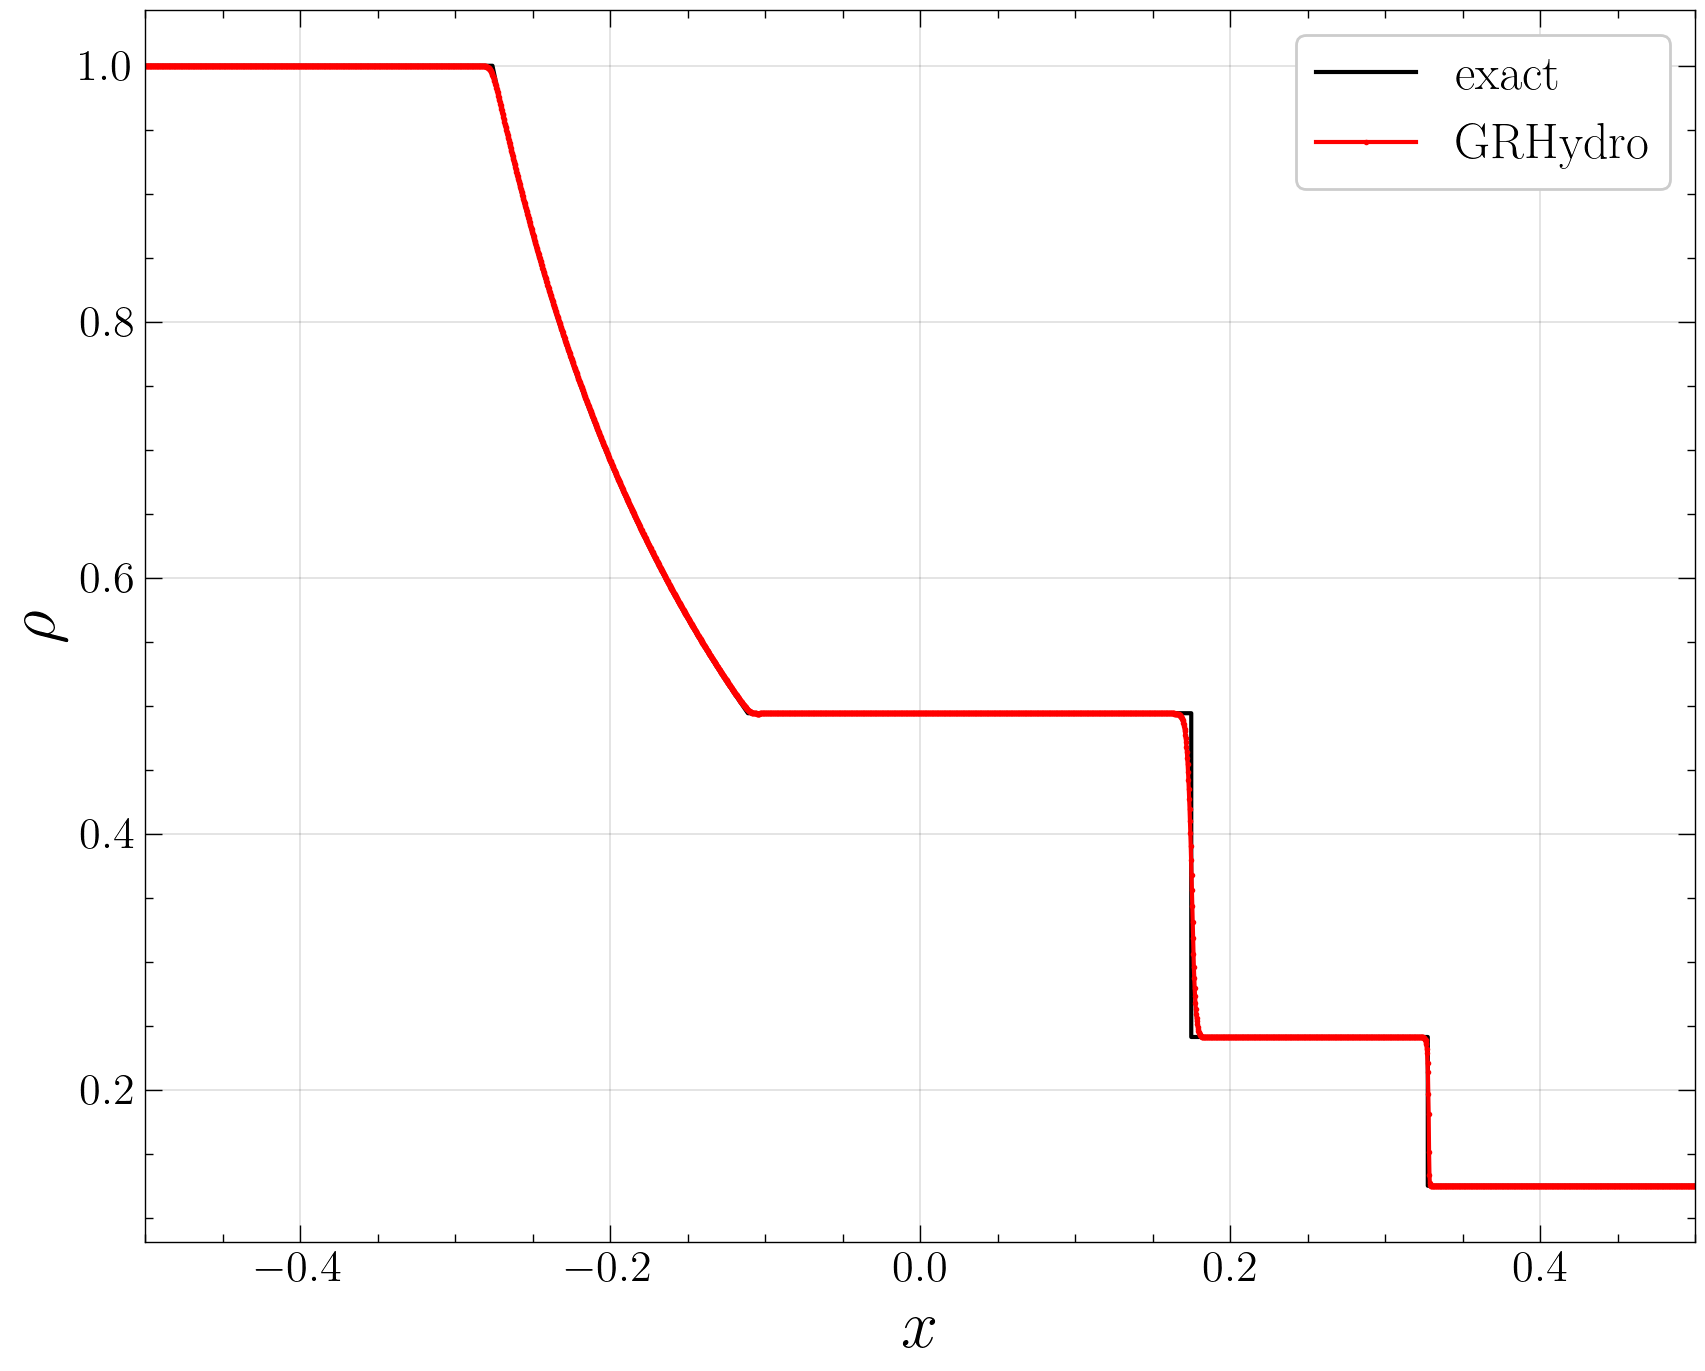

In [18]:
plt.plot(x_exact, rho_exact, c='k', label="exact")
plt.plot(rho_00025[rho_00025.iterations[-1]][0][0].coordinates()[0].data,rho_00025[rho_00025.iterations[-1]][0][0].data, marker='o', markersize=1, c='red', label="GRHydro")
plt.xlim(-0.5, 0.5)
plt.xlabel('$x$')
plt.ylabel('$\\rho$')
plt.legend();